In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Математическая модель Лотка-Вольтерра

В математической форме предложенная система имеет следующий вид:

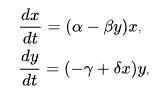

где x — количество жертв, y — количество хищников, t — время, 
$ 
 \alpha ,\beta ,\gamma ,\delta 
$
 — коэффициенты, отражающие взаимодействия между видами

# Решение системы уравнений


---


**Постановка задачи**

Рассматривается закрытый ареал, в котором обитают два вида — травоядные («жертвы») и хищники. Предполагается, что животные не иммигрируют и не эмигрируют, и что еды для травоядных животных имеется с избытком. Тогда уравнение изменения количества жертв (без учёта хищников) принимает вид:

$ {\frac {dx}{dt}}=\alpha x,$

где $\alpha$  — коэффициент рождаемости жертв, $x$ — величина популяции жертв,  ${\tfrac {dx}{dt}}$ — скорость прироста популяции жертв. 

Пока хищники не охотятся, они вымирают, следовательно, уравнение для численности хищников (без учёта численности жертв) принимает вид:


${\frac {dy}{dt}}=-\gamma y $,

где $\gamma$  — коэффициент убыли хищников, $y$ — величина популяции хищников, ${\tfrac {dy}{dt}}$ — скорость прироста популяции хищников.

При встречах хищников и жертв (частота которых прямо пропорциональна величине $xy$) происходит убийство жертв с коэффициентом $\beta$ , сытые хищники способны к воспроизводству с коэффициентом $\delta$ . С учётом этого, система уравнений модели такова:

$ 
\begin{equation*}
 \begin{cases}
{\dfrac {dx}{dt}}=\alpha x-\beta xy=(\alpha -\beta y)x
\\
{\dfrac {dy}{dt}}=-\gamma y+\delta xy=(\delta x-\gamma )y\
  \end{cases}
\end{equation*}
$

**Решение задачи**

Нахождение стационарной позиции системы
Для стационарной позиции ${\bar {x}}$ >0, ${\bar  {y}}$ >0 изменение численности популяции равно нулю. Следовательно:

$\alpha$ ${\bar {x}}$-$\beta$ ${\bar {x}}{\bar {y}}$=0,

$-\gamma$ ${\bar {y}}$+$\delta$ ${\bar {x}}{\bar {y}}$=0,

из чего следует, что стационарная точка системы, вокруг которой происходят колебания, определяется следующим образом:

${\bar  {x}}={\frac  {\gamma }{\delta }},$

${\bar  {y}}={\frac  {\alpha }{\beta }}.$

**Задание отклонения в системе**

При внесении в систему колебаний ${\tilde  {x}}\ll {\bar  {x}}$ и ${\tilde  {y}}\ll {\bar  {y}},$ из-за малой их величины их квадратами, кубами и последующими степенями (${\tilde {x}}^{n}$) можно пренебречь. Таким образом, популяции $x и $y с малыми отклонениями описываются следующими выражениями:

$x={\bar {x}}+{\tilde {x}},$

$y={\bar {y}}+{\tilde {y}}.$

Применяя их к уравнениям модели, следует:

${\frac  {d{\tilde  {x}}}{dt}}=-{\frac  {\beta \gamma }{\delta }}{\tilde  {y}}$

${\frac  {d{\tilde  {y}}}{dt}}={\frac  {\delta \alpha }{\beta }}{\tilde  {x}}$

Дифференцирование одного из этих уравнений и подстановка в другое даёт следующий результат:

${\frac  {d^{2}{\tilde  {x}}}{dt^{2}}}=-{\frac  {\beta \gamma }{\delta }}{\frac  {\delta \alpha }{\beta }}{\tilde  {x}}=-\alpha \gamma {\tilde  {x}},$

${\frac  {d^{2}{\tilde  {x}}}{dt^{2}}}+\alpha \gamma {\tilde  {x}}=0.$

Полученное выражение является пропорциональным уравнением гармонического осциллятора с периодом $T={\frac  {2\pi }{{\sqrt  {\alpha \gamma }}}}.$

In [ ]:
alpha = 1.1
beta = 0.4
gamma = 0.4
delta = 0.1

# Шаг ДУ (Точность)
dt = 0.01

# отрезок времени 
N = 5000
t = np.arange(N)*dt

# начальные условия 
x0 = 20
y0 = 5

In [ ]:
# оду
def f(x, y):
    xdot = (alpha - beta*y)*x
    ydot = (delta*x - gamma)*y
    return xdot, ydot

# Использование метода рунге кута
def next(x, y):
    xdot1, ydot1 = f(x, y)
    xdot2, ydot2 = f(x + xdot1*dt/2, y + ydot1*dt/2)
    xdot3, ydot3 = f(x + xdot2*dt/2, y + ydot2*dt/2)
    xdot4, ydot4 = f(x + xdot3*dt, y + ydot3*dt)
    xnew = x + (xdot1 + 2*xdot2 + 2*xdot3 + xdot4)*dt/6
    ynew = y + (ydot1 + 2*ydot2 + 2*ydot3 + ydot4)*dt/6
    return xnew, ynew

In [ ]:
# Производим симуляцию 
x = np.zeros(N)
y = np.zeros(N)
x[0] = x0
y[0] = y0
for k in range(N-1):
    x[k+1], y[k+1] = next(x[k], y[k])

**Рисуем график и фазовый портрет**

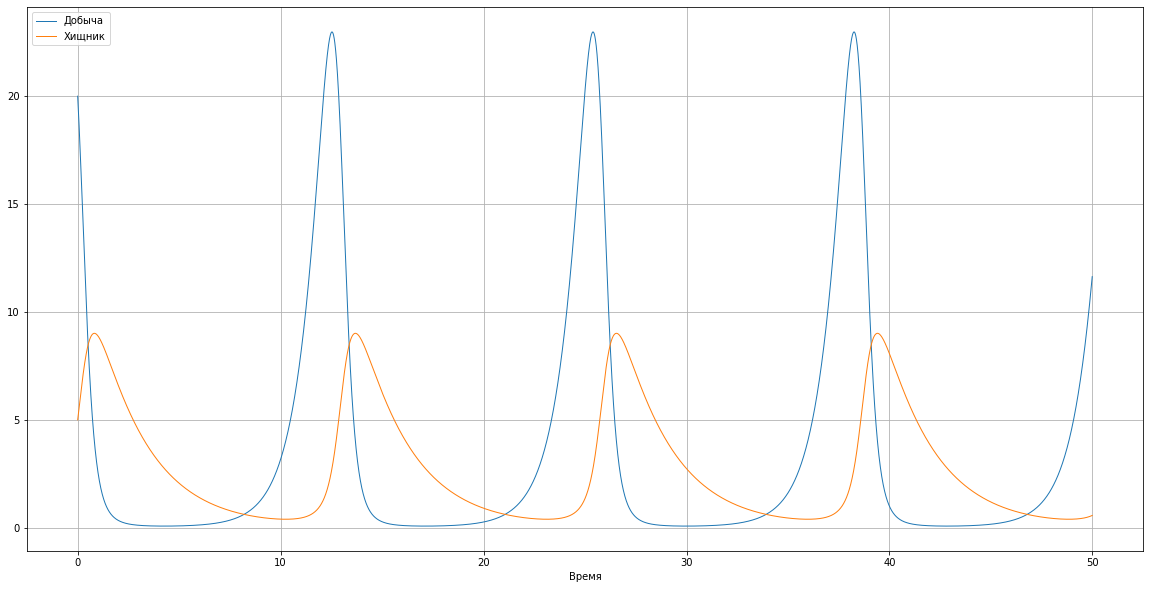

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(t,x, label='Добыча', linewidth=1)
plt.plot(t,y, label='Хищник', linewidth=1)
plt.grid()
plt.legend(loc = 'upper left')
plt.xlabel('Время')

plt.show()

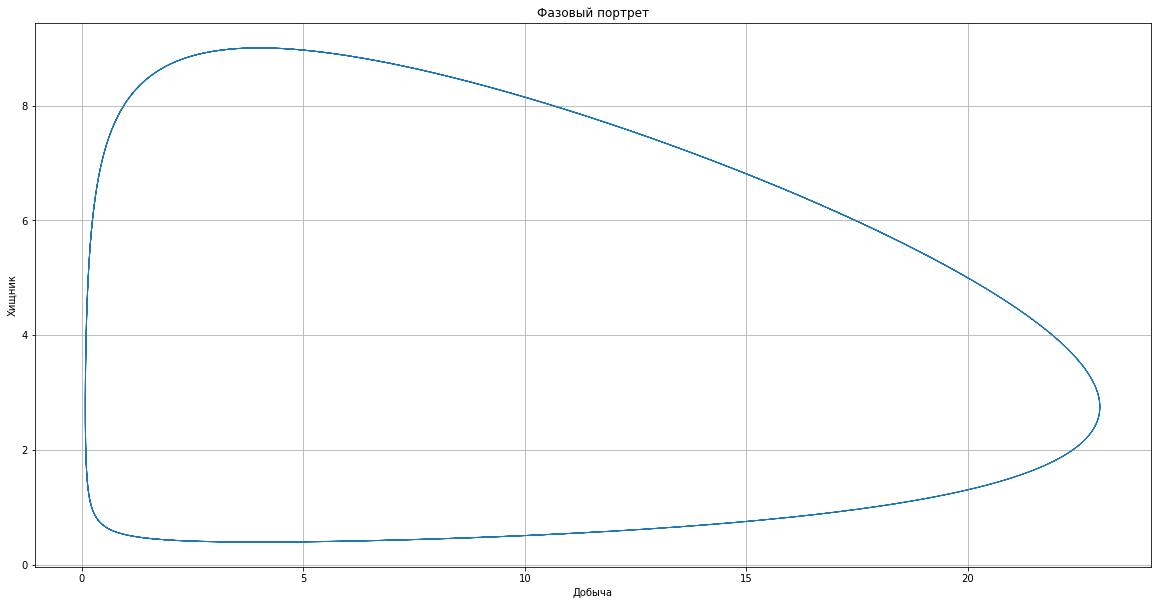

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(x,y, linewidth=1)

plt.grid()
plt.xlabel('Добыча')
plt.ylabel('Хищник')
plt.title('Фазовый портрет')

plt.show()



---



In [ ]:
def ode(y, t, b, c):
        theta, omega = y
        dydt = np.array([
        (alpha - beta * x[1]) * x[0],
        (-gamma + delta * x[0]) * x[1] 
        ])
        return dydt

In [ ]:
def calcODE(args, y0, dy0, ts = 10, nt = 101):
    y0 = [y0, dy0]
    t = np.linspace(0, ts, nt)
    sol = odeint(ode, y0, t, args)
    return sol

In [ ]:
def drawPhasePortrait(args, deltaX = 1, deltaDX = 1, startX = 0,  stopX = 5, startDX = 0, stopDX = 5, ts = 10, nt = 101):
    for y0 in range(startX, stopX, deltaX):
            for dy0 in range(startDX, stopDX, deltaDX):
                sol = calcODE(args, y0, dy0, ts, nt)
                plt.plot(sol[:, 1], sol[:, 0], 'b')
    plt.xlabel('x')
    plt.ylabel('dx/dt')
    plt.grid()
    plt.show()

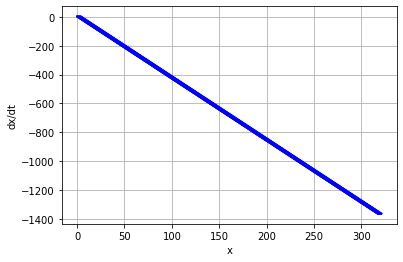

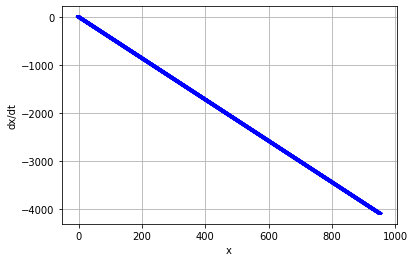

In [ ]:
b = 0.25
c = 5.0
args=(b, c)
drawPhasePortrait(args)
drawPhasePortrait(args, 1, 1, -10, 10, -5, 5, ts = 30, nt = 301)



---



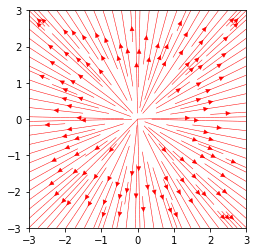

In [ ]:
X, Y = np.meshgrid(np.linspace(-3.0, 3.0, 30), np.linspace(-3.0, 3.0, 30))
U, V = next(X,Y)

plt.streamplot(X, Y, U, V, color='r', linewidth=0.5, density=1.6)
plt.axis('square')
plt.axis([-3, 3, -3, 3])
plt.show()

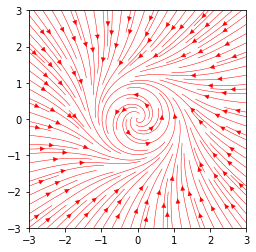

In [ ]:
def dF(r, theta):
    return 0.5*r*(1 - r*r), 1+0*theta

X, Y = np.meshgrid(np.linspace(-3.0, 3.0, 30), np.linspace(-3.0, 3.0, 30))
R, Theta = (X**2 + Y**2)**0.5, np.arctan2(Y, X)
dR, dTheta = dF(R, Theta)
C, S = np.cos(Theta), np.sin(Theta)
U, V = dR*C - R*S*dTheta, dR*S+R*C*dTheta

plt.streamplot(X, Y, U, V, color='r', linewidth=0.5, density=1.6)
plt.axis('square')
plt.axis([-3, 3, -3, 3])
plt.show()



---



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


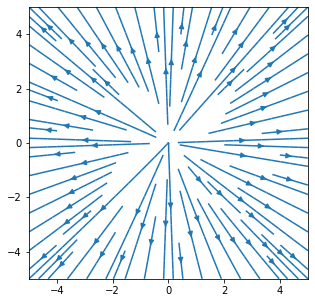

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# init cartesian grid
Y, X = np.mgrid[-5:5:101j, -5:5:101j]

# get corresponding polar grid
R, T = next(X,Y)

# stream function
U = 1 # velocity(?) constant

# substitute and differentiate
denom = np.power(X*X + Y*Y, 3/2) * (np.sqrt(1 + ((Y*Y)/(X*X))))
Sx = T
Sy = R


# plot the figure
fig = plt.figure(figsize=(5,5))
ax = plt.subplot()
ax.streamplot(X, Y, Sy, Sx)
plt.show()



---



ValueError: ignored

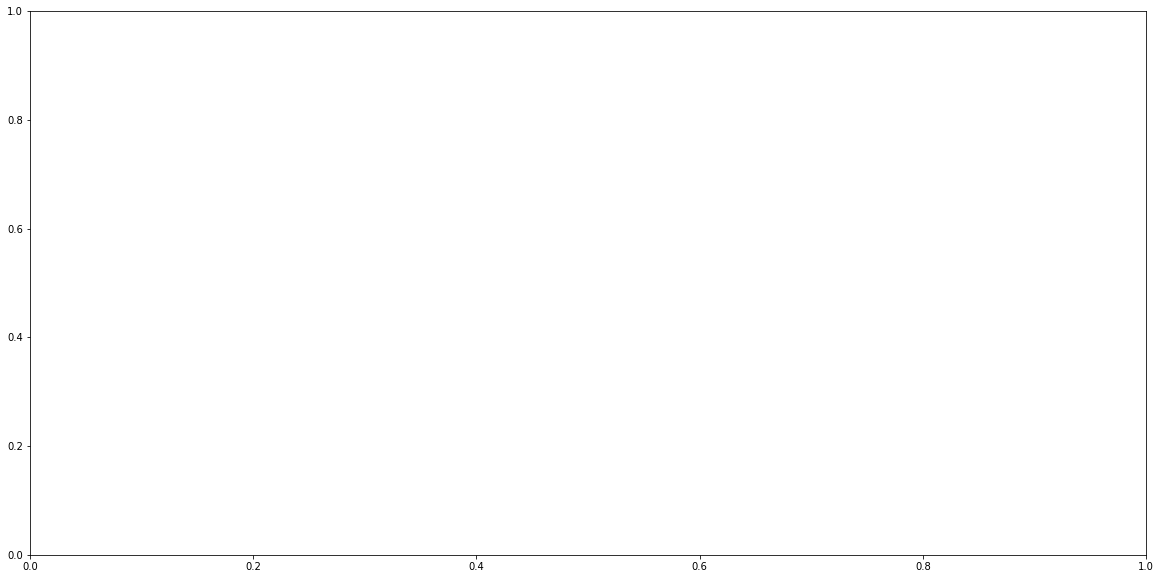

In [ ]:
plt.figure(figsize=(20,10))
#plt.plot(x,y, linewidth=1)
X, Y = np.meshgrid(np.linspace(0, 30.0, 30), np.linspace(0, 30.0, 30))
plt.streamplot(x, t, X, Y, color='r', linewidth=0.5, density=1.6)
plt.grid()
plt.xlabel('Добыча')
plt.ylabel('Хищник')
plt.title('Фазовый портрет')

plt.show()